<a href="https://colab.research.google.com/github/Dedeepya200/keratoconus/blob/main/keratoconus_efficientnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow matplotlib numpy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Replace 'keratoconus_dataset' with your actual folder name
dataset_path = "/content/drive/MyDrive/keratoconus_dataset"

# List files in the dataset folder
print(os.listdir(dataset_path))


['.DS_Store', 'Train_Validation sets', 'Independent Test Set']


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/keratoconus_dataset/Train_Validation sets/Train_Validation sets"

# List the actual dataset categories
print(os.listdir(dataset_path))


['Suspect', 'Normal', 'Keratoconus']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
base_dir = "/content/drive/MyDrive/keratoconus_dataset/Train_Validation sets/Train_Validation sets"

# Define ImageDataGenerator for training (with augmentation) and validation (without augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values
    rotation_range=20,       # Rotate images randomly
    width_shift_range=0.2,   # Shift width
    height_shift_range=0.2,  # Shift height
    shear_range=0.2,         # Shear transformations
    zoom_range=0.2,          # Zoom transformations
    horizontal_flip=True,    # Flip images
    validation_split=0.2     # 20% validation split
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),  # Resize to fit CNN input
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    subset='training'
)

# Load validation data
val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2534 images belonging to 3 classes.
Found 633 images belonging to 3 classes.


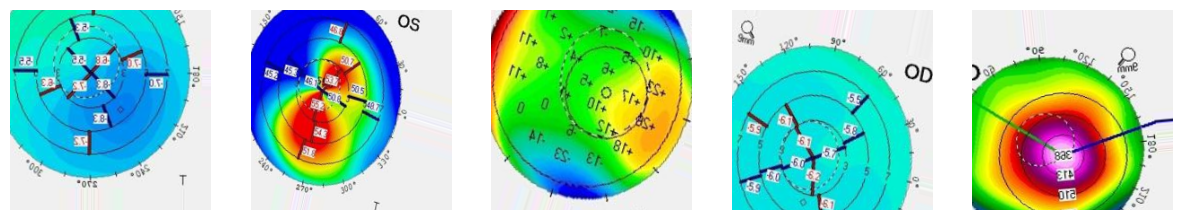

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch one batch of images
images, labels = next(train_generator)

# Display 5 sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.axis('off')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the feature maps into a 1D vector
    Flatten(),

    # Fully Connected Layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(3, activation='softmax')  # 3 classes: Keratoconus, Suspect, Normal
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Show the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import Input

# Define CNN model (Fixed Warning)
model = Sequential([
    Input(shape=(224, 224, 3)),  # Use Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Show summary again
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # You can increase epochs later
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
24/80 ━━━━━━━━━━━━━━━━━━━━ 20:54 22s/step - accuracy: 0.4157 - loss: 1.9553

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    rotation_range=20,  # Augmentation: Random rotation
    width_shift_range=0.2,  # Augmentation: Horizontal shift
    height_shift_range=0.2,  # Augmentation: Vertical shift
    shear_range=0.2,  # Augmentation: Shearing
    zoom_range=0.2,  # Augmentation: Zoom
    horizontal_flip=True,  # Augmentation: Flip images
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)  # Only normalize, no augmentation for validation

# Now, create data generators
train_generator = train_datagen.flow_from_directory(
    "path_to_training_data",  # Change this to your actual training folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    "path_to_validation_data",  # Change this to your actual validation folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_training_data'

In [ ]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.2  # 80% train, 20% validation
)

# Training Set
train_generator = train_datagen.flow_from_directory(
    dataset_path + "/Train_Validation sets",
    target_size=(300, 300),  # EfficientNetB3 requires 300x300 images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation Set
val_generator = train_datagen.flow_from_directory(
    dataset_path + "/Train_Validation sets",
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


NameError: name 'dataset_path' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = "/content/drive/My Drive/Keratoconus_dataset"


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.2  # 80% train, 20% validation
)

# Training Set
train_generator = train_datagen.flow_from_directory(
    dataset_path + "/Train_Validation sets",
    target_size=(300, 300),  # EfficientNetB3 requires 300x300 images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation Set
val_generator = train_datagen.flow_from_directory(
    dataset_path + "/Train_Validation sets",
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Keratoconus_dataset/Train_Validation sets'

In [ ]:
import os

dataset_path = "/content/drive/My Drive/keratoconus_dataset"
print(os.listdir(dataset_path))  # Check folders inside


['.DS_Store', 'Train_Validation sets', 'Independent Test Set']


In [ ]:
print(os.listdir(dataset_path + "/Train_Validation sets"))  # Check inside


['Train_Validation sets']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Contents: ['.DS_Store', 'Train_Validation sets', 'Independent Test Set']
Train_Validation sets Contents: ['Suspect', 'Normal', 'Keratoconus']
Found 2534 images belonging to 3 classes.
Found 633 images belonging to 3 classes.
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1768s 22s/step - accuracy: 0.3776 - loss: 1.1038 - val_accuracy: 0.3965 - val_loss: 1.0852
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.3870 - loss: 1.0932 - val_accuracy: 0.4708 - val_loss: 1.0863
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.3760 - loss: 1.0963 - val_accuracy: 0.4313 - val_loss: 1.0823
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.3877 - loss: 1.0931 - val_accuracy: 0.3965 - val_loss: 1.0823
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4119 - loss: 1.0807 - val_accuracy: 0.3965 - val_loss: 1.0833
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.3896 - loss: 1.0924 - val_accuracy: 0.3965 - val_loss: 1.0837
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.3932 - loss: 1.0895 - val_accuracy: 0.3965 - val_loss: 1.0836
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4165 - loss: 1.0789 - val_accuracy: 0.4771 - val_lo

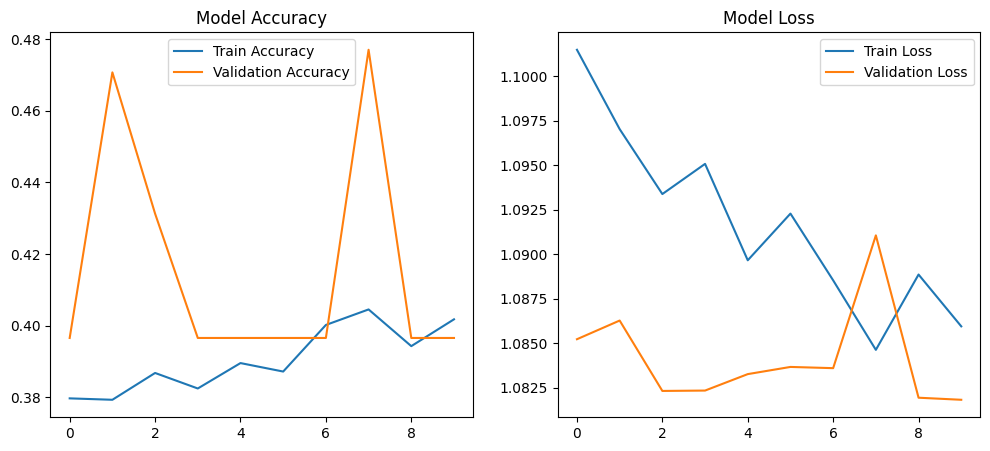

Model saved successfully!
Found 1050 images belonging to 3 classes.
33/33 ━━━━━━━━━━━━━━━━━━━━ 709s 22s/step - accuracy: 0.6771 - loss: 0.9716
Test Accuracy: 33.33%


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# 🔹 Mount Google Drive (if running on Colab)
from google.colab import drive
drive.mount('/content/drive')

# 🔹 Dataset Path
dataset_path = "/content/drive/My Drive/keratoconus_dataset"

# ✅ Step 1: Check dataset structure
print("Dataset Contents:", os.listdir(dataset_path))

# 🔹 Check contents of Train_Validation sets
train_val_path = os.path.join(dataset_path, "Train_Validation sets")
print("Train_Validation sets Contents:", os.listdir(train_val_path))

# ✅ Step 2: Image Preprocessing & Augmentation
img_size = 300  # EfficientNetB3 requires 300x300 images
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% train, 20% validation
)

# 🔹 Training Generator
train_generator = train_datagen.flow_from_directory(
    train_val_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# 🔹 Validation Generator
val_generator = train_datagen.flow_from_directory(
    train_val_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# ✅ Step 3: Load Pretrained Model (EfficientNetB3)
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False  # Freeze pretrained layers

# 🔹 Add Custom Layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)  # Reduce overfitting
output_layer = Dense(3, activation='softmax')(x)  # 3 classes (Keratoconus, Suspect, Normal)

# 🔹 Create Final Model
model = Model(inputs=base_model.input, outputs=output_layer)

# ✅ Step 4: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Step 5: Train the Model
epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

# ✅ Step 6: Plot Accuracy & Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

# ✅ Step 7: Save the Model
model.save('/content/drive/My Drive/keratoconus_model.h5')
print("Model saved successfully!")

# ✅ Step 8: Evaluate on Test Set
test_path = os.path.join(dataset_path, "Independent Test Set")
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [ ]:

dataset_path = "/content/drive/My Drive/keratoconus_dataset/Train_Validation sets"


In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1.0/255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(300, 300),  # Resize images to 300x300
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical'
)


Found 3167 images belonging to 3 classes.
Found 3167 images belonging to 3 classes.


In [ ]:

base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# 📌 Freeze Some Layers (Only Fine-Tune the Last 20 Layers)
for layer in base_model.layers[:-20]:  # Freeze all layers except last 20
    layer.trainable = False


In [ ]:
# 📌 Add New Fully Connected Layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
output = Dense(3, activation='softmax')(x)  # 3 Classes: Suspect, Normal, Keratoconus

# 📌 Create Final Model
model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy',
                                 factor=0.5,
                                 patience=3,
                                 min_lr=1e-6)


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[lr_scheduler]
)


Epoch 1/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.3745 - loss: 1.1030 - val_accuracy: 0.3966 - val_loss: 1.1036 - learning_rate: 1.0000e-04
Epoch 2/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 98s 996ms/step - accuracy: 0.3892 - loss: 1.0921 - val_accuracy: 0.3966 - val_loss: 1.0917 - learning_rate: 1.0000e-04
Epoch 3/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.4023 - loss: 1.0889 - val_accuracy: 0.3966 - val_loss: 1.0866 - learning_rate: 1.0000e-04
Epoch 4/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 96s 974ms/step - accuracy: 0.3799 - loss: 1.0905 - val_accuracy: 0.3966 - val_loss: 1.0897 - learning_rate: 1.0000e-04
Epoch 5/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 97s 977ms/step - accuracy: 0.4052 - loss: 1.0810 - val_accuracy: 0.3969 - val_loss: 1.0796 - learning_rate: 5.0000e-05
Epoch 6/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.4374 - loss: 1.0739 - val_accuracy: 0.3966 - val_loss: 1.0868 - learning_rate: 5.0000e-05
Epoch 7/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# ✅ 1. Load EfficientNetB3 Base Model (Pre-trained)
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# ✅ 2. Freeze Initial Layers (Keep Pre-trained Weights)
for layer in base_model.layers[:150]:  # Freeze first 150 layers
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
output_layer = Dense(3, activation='softmax')(x)  # Define output properly

# Create model with correct output
model = Model(inputs=base_model.input, outputs=output_layer)


# ✅ 5. Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ✅ 6. Image Data Augmentation (For Better Generalization)
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)  # No Augmentation for Validation

# ✅ 7. Load Dataset
train_dir = "/content/drive/MyDrive/keratoconus_dataset/Train_Validation sets"
val_dir = "/content/drive/MyDrive/keratoconus_dataset/Validation"

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(300, 300), batch_size=32, class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(300, 300), batch_size=32, class_mode='categorical'
)

# ✅ 8. Train Model (Initial Phase)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,  # Initial Training Phase
    callbacks=[
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ]
)

# ✅ 9. Unfreeze More Layers for Fine-Tuning (Improve Learning)
for layer in base_model.layers[-50:]:  # Unfreeze Last 50 Layers
    layer.trainable = True

# ✅ 10. Recompile with a Higher Learning Rate
model.compile(optimizer=Adam(learning_rate=3e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ✅ 11. Fine-Tune Model
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,  # More Training
    callbacks=[
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
        EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
    ]
)

# ✅ 12. Save Final Model
model.save("/content/drive/MyDrive/Final_Model.h5")

print("✅ Model Training Completed Successfully!")


Found 3167 images belonging to 3 classes.


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/keratoconus_dataset/Validation'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB3, VGG19, ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define image size & batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/keratoconus_dataset/Train_Validation sets',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/keratoconus_dataset/Train_Validation sets',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Load pretrained models without top layers
efficient_net = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze pretrained layers
for model in [efficient_net, vgg19, resnet50]:
    model.trainable = False

# Extract features
x1 = GlobalAveragePooling2D()(efficient_net.output)
x2 = GlobalAveragePooling2D()(vgg19.output)
x3 = GlobalAveragePooling2D()(resnet50.output)

# Concatenate extracted features
merged = Concatenate()([x1, x2, x3])
merged = Dense(512, activation='relu')(merged)
merged = BatchNormalization()(merged)
merged = Dropout(0.5)(merged)
output = Dense(train_generator.num_classes, activation='softmax')(merged)

# Define final model
model = Model(inputs=[efficient_net.input, vgg19.input, resnet50.input], outputs=output)

# Compile model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

# ... (Previous code remains the same) ...

# Function to generate multi-input data
def generate_multi_input(generator):
    def gen():
        while True:
            x_batch, y_batch = next(generator)
            yield (x_batch, x_batch, x_batch), y_batch  # Yield a tuple of image batches
    return gen

# Convert generators to TensorFlow datasets (Modified)
train_multi_input = tf.data.Dataset.from_generator(
    generate_multi_input(train_generator),
    output_types=((tf.float32, tf.float32, tf.float32), tf.float32), # Correct output types
    output_shapes=(((None, 224, 224, 3), (None, 224, 224, 3), (None, 224, 224, 3)), (None, train_generator.num_classes))
)

val_multi_input = tf.data.Dataset.from_generator(
    generate_multi_input(val_generator),
    output_types=((tf.float32, tf.float32, tf.float32), tf.float32),  # Correct output types
    output_shapes=(((None, 224, 224, 3), (None, 224, 224, 3), (None, 224, 224, 3)), (None, val_generator.num_classes))
)

# ... (Rest of the code remains the same) ...
# Train model
history = model.fit(
    train_multi_input,
    validation_data=val_multi_input,
    epochs=EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=callbacks
)

# Plot accuracy & loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


Found 2534 images belonging to 3 classes.
Found 633 images belonging to 3 classes.
Epoch 1/20
13/80 ━━━━━━━━━━━━━━━━━━━━ 21:47 20s/step - accuracy: 0.4463 - loss: 1.3451